<H1> <CENTER> FORTALEZA'S DEMOGRAPHIC DATA ANALYSIS  </CENTER> </H1>
<H3> <CENTER> UNTIL 2010  </CENTER> </H3>

<center> <b> Keven Henrique Miranda Chaves </b> <br>
Graduando em Engenharia de computação           <br>
<i> Formação de data science </i>
    
</center>

##### Importing necessaries libraries

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc('figure', figsize=(15,8)) #def figsize fix
import seaborn as sns
import pandas as pd

##### Dataset = Fortaleza's demographic data
- Download in [https://dados.fortaleza.ce.gov.br/]

In [54]:
data = pd.read_excel('Dataset/dadosdemograficosdefortalezaate2010.xlsx', header=2)
data.head()

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio
0,REGIONAL 6,Aerolândia,11360.0,5365.0,5995.0,89.49,2400.0,8118.0,842.0,21.13,71.46,7.41,39.94,3.45
1,REGIONAL 4,Aeroporto,8618.0,4160.0,4458.0,93.32,2389.0,5918.0,311.0,27.72,68.67,3.61,45.62,3.61
2,REGIONAL 2,Aldeota,42361.0,17980.0,24381.0,73.75,5600.0,31587.0,5174.0,13.22,74.57,12.21,34.11,3.08
3,REGIONAL 6,Alto da Balança,12814.0,5930.0,6884.0,86.14,2709.0,8941.0,1164.0,21.14,69.78,9.08,43.32,3.39
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52


## Data preprocessing
##### Checking the dataset:size, null data, basic informations and deleting null data.

In [55]:
data.shape #size of dataset (122 rows and 14 columns)

(122, 14)

In [56]:
data.info() #Information of dataset, knowing about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REGIONAL                          122 non-null    object 
 1   Bairros                           120 non-null    object 
 2   População Total                   120 non-null    float64
 3   Pop. Homens                       120 non-null    float64
 4   Pop. Mulheres                     120 non-null    float64
 5   Razão de Sexo                     120 non-null    float64
 6   População (0-14 anos)             120 non-null    float64
 7   População (15-64 anos)            120 non-null    float64
 8   População (> 64 anos)             120 non-null    float64
 9   % População (0-14 anos)           120 non-null    float64
 10  % População (15-64 anos)          120 non-null    float64
 11  % População (> 64 anos)           120 non-null    float64
 12  Razão de

In [57]:
#Checking null data
data.isnull().sum()

REGIONAL                            0
Bairros                             2
População Total                     2
Pop. Homens                         2
Pop. Mulheres                       2
Razão de Sexo                       2
População (0-14 anos)               2
População (15-64 anos)              2
População (> 64 anos)               2
% População (0-14 anos)             2
% População (15-64 anos)            2
% População (> 64 anos)             2
Razão de Dependência                2
Média de moradores por domicílio    2
dtype: int64

In [58]:
#Searching null data, was found null data in all columns except in REGIONAL.
#After the checking the result was:

selecao = data['Bairros'].isnull()
data[selecao]

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio
120,"Fonte: Censo 2010, IBGE.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,* Bairros novos (sem informação),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Deleting null data in all dataset
data.dropna(inplace=True)

In [60]:
#Checking again about null data = OK
data.isnull().sum()

REGIONAL                            0
Bairros                             0
População Total                     0
Pop. Homens                         0
Pop. Mulheres                       0
Razão de Sexo                       0
População (0-14 anos)               0
População (15-64 anos)              0
População (> 64 anos)               0
% População (0-14 anos)             0
% População (15-64 anos)            0
% População (> 64 anos)             0
Razão de Dependência                0
Média de moradores por domicílio    0
dtype: int64

#### Observations: A SMALL ANALYSIS BEFORE DATA ANALYSIS
1. The last column = 'Média de moradores por domicílio'. It has a interesting data, usully mean is size_of_thing by size_of_diferente_thing. In our case population size by houses size. 
2. However, we haven't size house, so, we have make a matemathics manipulation
3. So, we have: (População Total/Domicílio Total) = Média de moradores por domicílio
4. Soon we have: (População Total/Média de moradores por domicílio) = Domicílio Total

Let's 

In [61]:
#Creating new column
data['Domicílio Total'] = (data['População Total'] / data['Média de moradores por domicílio'])
data.head()

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
0,REGIONAL 6,Aerolândia,11360.0,5365.0,5995.0,89.49,2400.0,8118.0,842.0,21.13,71.46,7.41,39.94,3.45,3292.753623
1,REGIONAL 4,Aeroporto,8618.0,4160.0,4458.0,93.32,2389.0,5918.0,311.0,27.72,68.67,3.61,45.62,3.61,2387.257618
2,REGIONAL 2,Aldeota,42361.0,17980.0,24381.0,73.75,5600.0,31587.0,5174.0,13.22,74.57,12.21,34.11,3.08,13753.571429
3,REGIONAL 6,Alto da Balança,12814.0,5930.0,6884.0,86.14,2709.0,8941.0,1164.0,21.14,69.78,9.08,43.32,3.39,3779.941003
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52,6730.113636


##### The error below show us, that null values was created when new column was implemented

In [62]:
# Using apply() function with lambda for get integer values in column 'Domicílio total'
#data['Domicílio Total'].apply(lambda x: int(x))
#But a error below

In [63]:
#Checking again about null data
data.isnull().sum()

REGIONAL                            0
Bairros                             0
População Total                     0
Pop. Homens                         0
Pop. Mulheres                       0
Razão de Sexo                       0
População (0-14 anos)               0
População (15-64 anos)              0
População (> 64 anos)               0
% População (0-14 anos)             0
% População (15-64 anos)            0
% População (> 64 anos)             0
Razão de Dependência                0
Média de moradores por domicílio    0
Domicílio Total                     3
dtype: int64

##### Searching new null data

In [64]:
#Searching new null data
#Was possible to check 3 data from dataset that it is missing, even though let's delete this data
visualization_null_data = data['Domicílio Total'].isnull() == True
data[visualization_null_data]

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
77,REGIONAL 5,Novo Mondubim*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
78,REGIONAL 3,Olavo Oliveira*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
88,REGIONAL 6,Parque Santa Maria*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


##### Deleting new null data

In [65]:
#DELETING ROWS THAT IS NULL
data.drop([77, 78, 88], axis=0, inplace=True)

In [66]:
# Desordering indexs
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
           dtype='int64', length=117)

In [67]:
# CHECKING AGAIN == OK
visualization_null_data = data['Domicílio Total'].isnull() == True
data[visualization_null_data]

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total


In [68]:
# ordering the rows, after data deleted
data.index = range(data.shape[0])

In [69]:
# Verifying == OK
data.index

RangeIndex(start=0, stop=117, step=1)

In [70]:
# Using apply() function with lambda for get integer values in column 'Domicílio total'
data['Domicílio Total'] = data['Domicílio Total'].apply(lambda x: int(x))
data.head()

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
0,REGIONAL 6,Aerolândia,11360.0,5365.0,5995.0,89.49,2400.0,8118.0,842.0,21.13,71.46,7.41,39.94,3.45,3292
1,REGIONAL 4,Aeroporto,8618.0,4160.0,4458.0,93.32,2389.0,5918.0,311.0,27.72,68.67,3.61,45.62,3.61,2387
2,REGIONAL 2,Aldeota,42361.0,17980.0,24381.0,73.75,5600.0,31587.0,5174.0,13.22,74.57,12.21,34.11,3.08,13753
3,REGIONAL 6,Alto da Balança,12814.0,5930.0,6884.0,86.14,2709.0,8941.0,1164.0,21.14,69.78,9.08,43.32,3.39,3779
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52,6730


### EXPLORATORY DATA ANALYSIS

### ANALYSIS:

1. <font color="green"> ANALYSIS AMOUNT OF HOUSES (%) BY DISTRICT</font>
2. <font color="green"> ANALYSIS AMOUNT OF POPULATION X REGIONAL</font>
3. <font color="green"> ANALYSIS AMOUNT OF POPULATION MAJOR 64 OLD YEAR X REGIONAL</font>
3. <font color="green"> ANALYSIS AMOUNT OF POPULATION MAJOR 64 OLD YEAR X DISTRICT</font>
4. <font color="green"> ANALYSIS DEPENDENCE REASON FOR MENS AND WOMANS</font>
5. <font color="red"> ANALYSES AMOUNT MENS AND WOMANS FOR DISTRICT AND REGIONAL</font>

## 1 - Analysis amount of houses (%) by district

In [71]:
# create a new dataframe, that storage the larggest houses number with size = 10
data_nlargerst_by_domicilio = data.sort_values(by='Domicílio Total', ascending=False).head(10)
data_nlargerst_by_domicilio.head(3)

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
73,REGIONAL 5,Mondubim,76044.0,36555.0,39489.0,92.57,19726.0,53187.0,3131.0,25.94,69.94,4.12,42.97,3.44,22105
10,REGIONAL 1,Barra do Ceará,72423.0,34658.0,37765.0,91.77,18271.0,50651.0,3501.0,25.23,69.94,4.83,42.98,3.56,20343
115,REGIONAL 1,Vila Velha,61617.0,29108.0,32509.0,89.54,15394.0,42793.0,3430.0,24.98,69.45,5.57,43.99,3.55,17356


In [72]:
index = data_nlargerst_by_domicilio['Bairros']
values = data_nlargerst_by_domicilio['Domicílio Total']

#### Creating graphic area using subplots with matplotlib.pyplot

In [73]:
# Create graphic area for our visualization
area_1 = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [74]:
gpc1 = area_1.add_subplot(1,2,1)
gpc2 = area_1.add_subplot(1,2,2)

C:\Users\engke\AppData\Local\Temp/ipykernel_4872/2274123416.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  gpc2.set_xticklabels(index, rotation=45)


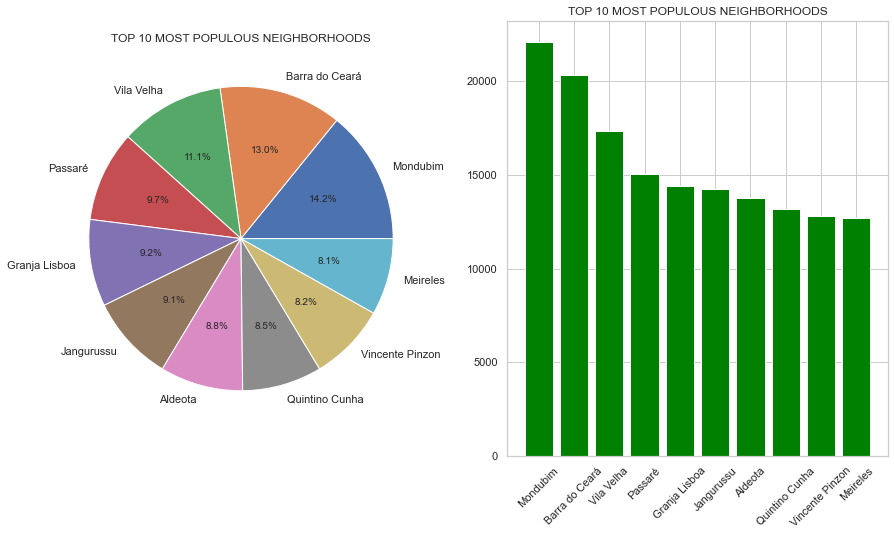

In [75]:
gpc1.pie(values, labels=index, autopct='%1.1f%%')
gpc1.set_title('TOP 10 MOST POPULOUS NEIGHBORHOODS')

gpc2.bar(index, values, width=0.8, color='Green')
gpc2.set_xticklabels(index, rotation=45)
gpc2.set_title('TOP 10 MOST POPULOUS NEIGHBORHOODS')

area_1

## 2. ANALYSIS AMOUNT OF POPULATION X REGIONAL

In [76]:
# Making tests for to find amount of population by regional
data.query("REGIONAL == 'REGIONAL 1'")['População Total'].sum()

363912.0

In [77]:
# I Remember that groupby make this. rsrs
popxreg = data.groupby('REGIONAL').sum()['População Total']
popxreg = popxreg.sort_values(ascending=False)
popxreg = popxreg.to_frame().reset_index()
popxreg

,REGIONAL,População Total
0,REGIONAL 5,541511.0
1,REGIONAL 6,541160.0
2,REGIONAL 1,363912.0
3,REGIONAL 2,363406.0
4,REGIONAL 3,360551.0
5,REGIONAL 4,281645.0


##### The graphic below, show us that the most population in regions

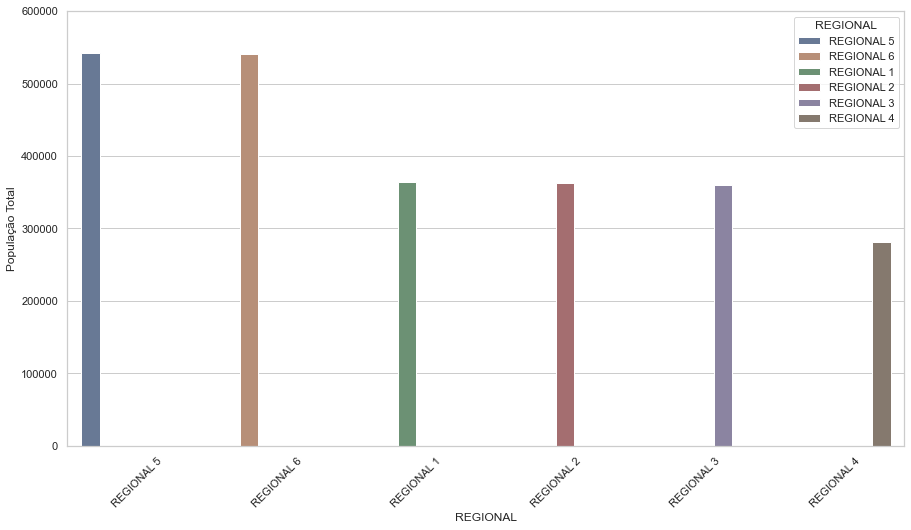

In [78]:
# Graaphic for represent the most part of city == regional 5
sns.barplot(data=popxreg, x='REGIONAL', y='População Total', hue=popxreg.REGIONAL, saturation=0.45)
plt.ylim(0,600000)
plt.xticks(rotation=45)
plt.show()

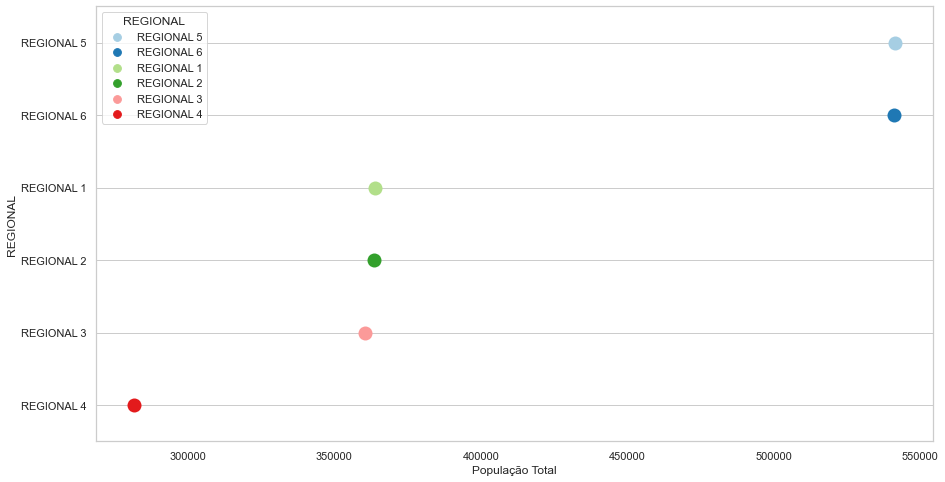

In [79]:
#ANOTHER DIFFERENT VISUALIZATION 
sns.swarmplot(data=popxreg, x="População Total", y='REGIONAL', hue='REGIONAL', palette='Paired', size=14)
plt.grid()

- According to these charts the biggest region is REGIONAL 5, so, let's begin new analysis, with our districts in this region
- New analysis below

In [80]:
# exploring the most region that is regional 5
#using groupby for new analysis
regional_5 = data.query("REGIONAL == 'REGIONAL 5'") #searching inside dataset
# ordering by Bairros, total sum, only colunm 'População Total'
group_regional5_x_popTotal = regional_5.groupby('Bairros').sum()['População Total'] 
group_regional5_x_popTotal = group_regional5_x_popTotal.sort_values(ascending=False)

#### Ploting another graphic, the biggest region (regional 5) and districts inside it.

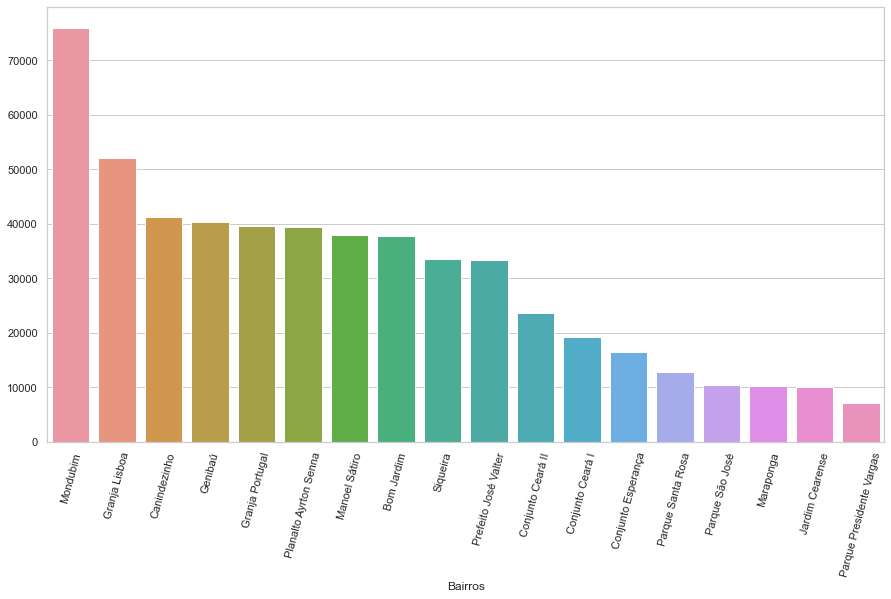

In [81]:
sns.barplot(x=group_regional5_x_popTotal.index, y=group_regional5_x_popTotal.values, data=regional_5)
plt.xticks(rotation=75)
plt.show()

# The districts inside region 6, show us that part of population of city, lives in this region

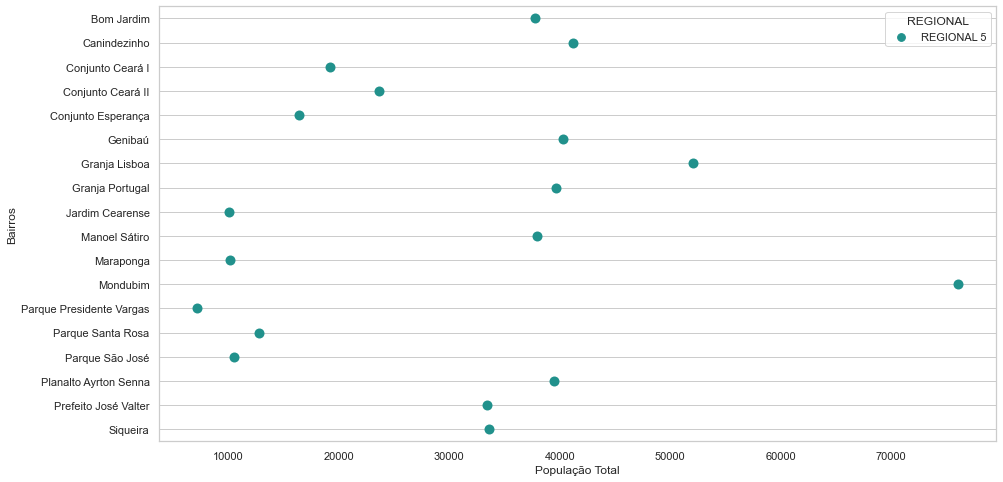

In [82]:
#ANOTHER DIFFERENT VISUALIZATION 
sns.swarmplot(data=regional_5, x="População Total", y="Bairros", hue='REGIONAL', palette='viridis', size=10)
plt.grid()

## 3.0 ANALYSIS AMOUNT OF POPULATION MAJOR 64 OLD YEAR X REGIONAL


In [83]:
# Understendering again about our dataset
data.sample(5, random_state=123)

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52,6730
90,REGIONAL 6,Passaré,50940.0,24541.0,26399.0,92.96,13607.0,35642.0,1691.0,26.71,69.97,3.32,42.92,3.38,15071
56,REGIONAL 4,Jardim América,12264.0,5455.0,6809.0,80.11,2254.0,8806.0,1204.0,18.38,71.80,9.82,39.27,3.38,3628
85,REGIONAL 5,Parque Presidente Vargas,7192.0,3560.0,3632.0,98.02,2135.0,4745.0,312.0,29.69,65.98,4.34,51.57,3.69,1949
28,REGIONAL 5,Conjunto Ceará I,19221.0,8850.0,10371.0,85.33,3682.0,14114.0,1425.0,19.16,73.43,7.41,36.18,3.51,5476


In [84]:
# assigning news variables
data_3 = data[['População Total', 'População (> 64 anos)']]
# was created new dataframe that receive new data (columns = 'População Total', 'População (> 64 anos)')
data_3 = data_3.sum() #sum of all values from columns

#### Visualization of amount of population in city and visualization of amount of population major 64 old years
- Take the numbers, we have:
- (data_3.values[1] * 100)/data_3.values[0] = 6.581354995646739
- 6,58% of pupulation is old

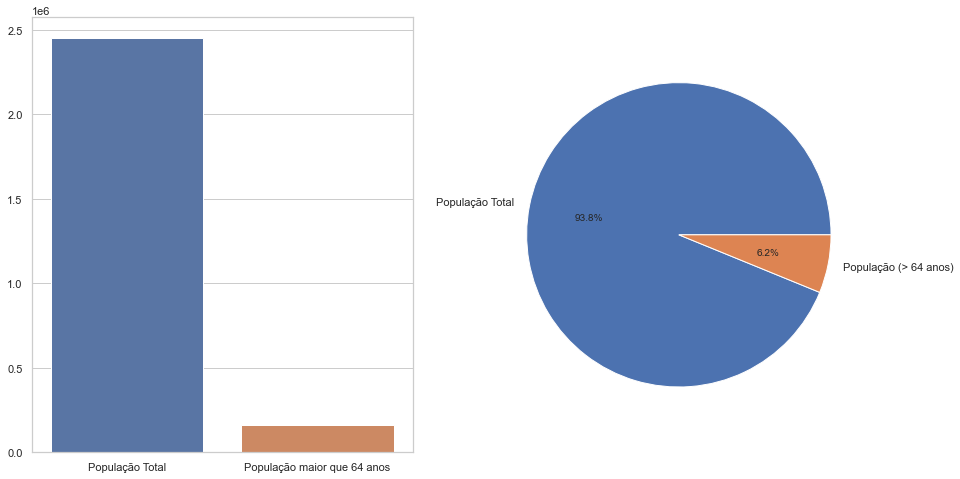

In [85]:
fig, ax = plt.subplots(1,2)

ax[0] = sns.barplot(x=['População Total', 'População maior que 64 anos'],
            y=data_3.values,
            data=data_3, ax=ax[0])

ax[1] = plt.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%')

#### LET'S EXPLORE THIS POPULATION OLD, THIS 6,5% WHO ARE?

#### <center> <font color="red"> We are separating this population in regions </font> </center>

In [86]:
#GROUPING BY REGIONAL WITH SUM, ONLY COLUMN NECESSARY
amount_old = data.groupby('REGIONAL').sum()['População (> 64 anos)']
amount_old = amount_old.sort_values(ascending=True)
amount_old = amount_old.to_frame().reset_index()
amount_old

,REGIONAL,População (> 64 anos)
0,REGIONAL 4,23875.0
1,REGIONAL 1,24876.0
2,REGIONAL 3,25706.0
3,REGIONAL 6,26403.0
4,REGIONAL 5,27158.0
5,REGIONAL 2,33369.0


C:\Users\engke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


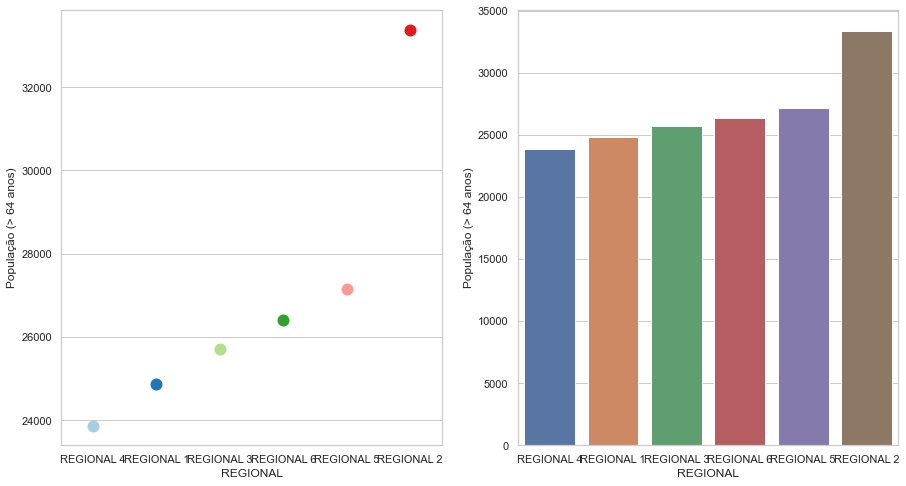

In [87]:
fig, ax = plt.subplots(1,2)

ax[0] = sns.swarmplot(data=amount_old, x='REGIONAL', y='População (> 64 anos)', palette='Paired', size=12, ax=ax[0])


ax[1] = sns.barplot(amount_old.REGIONAL, amount_old['População (> 64 anos)'], data=amount_old, ax=ax[1])

## 4.0 ANALYSIS AMOUNT OF POPULATION MAJOR 64 OLD YEAR X DISTRICT

#### Let's create a dataframe with population major 64 old

In [88]:
# Grouping Bairros by Population major 64 old and sorted only the 10 biggests
old_64_by_district = data.groupby('Bairros').sum()['População (> 64 anos)'].sort_values(ascending=True).nlargest(10)

# Converting this new variable in DataFrame
old_64_by_district = old_64_by_district.to_frame()

# Creating new column 'Bairros' with all numbers (ordering)
old_64_by_district['Bairros'] = old_64_by_district.index

# However, our index stay desorderin, we need ajust it. 
old_64_by_district.index = range(old_64_by_district.shape[0])

# Creating new column 'População Total' for our analysis
old_64_by_district['População Total'] = data['População Total']

# Printing
old_64_by_district

,População (> 64 anos),Bairros,População Total
0,5174.0,Aldeota,11360.0
1,4628.0,Meireles,8618.0
2,3501.0,Barra do Ceará,42361.0
3,3430.0,Vila Velha,12814.0
4,3175.0,Messejana,23690.0
5,3131.0,Mondubim,11703.0
6,3093.0,Centro,20070.0
7,3060.0,Prefeito José Valter,25846.0
8,2851.0,Joaquim Távora,3765.0
9,2726.0,São João do Tauape,21208.0


#### After the creation of our dataframe, we can print new graphics

<AxesSubplot:xlabel='População (> 64 anos)', ylabel='Bairros'>

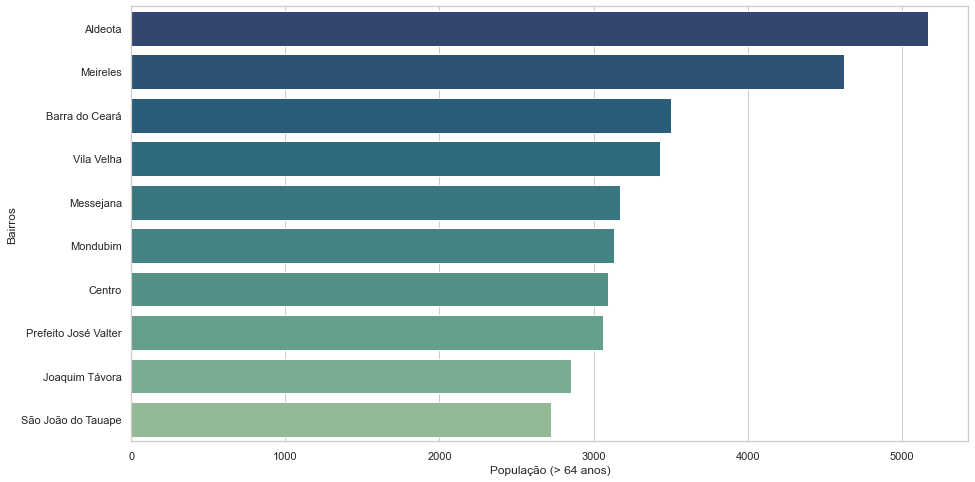

In [89]:
# Ploting new graphic, with 10 biggest districts with most population major 64 old years
sns.barplot(data=old_64_by_district, y='Bairros', x='População (> 64 anos)', palette='crest_r')

#### Another graphic with all districts
- The districs above, are highlights in graphic below

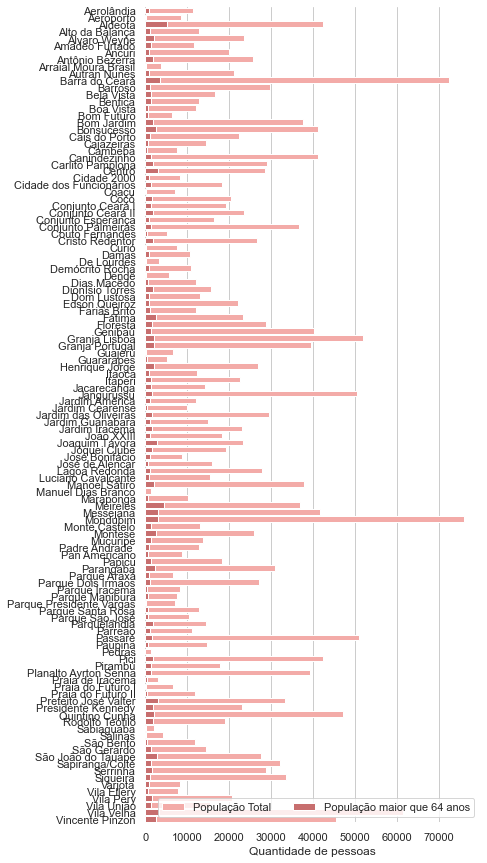

In [90]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

#Ploting two graphics (subplots) for undestering better
sns.set_color_codes("pastel")
sns.barplot(x="População Total", y="Bairros", data=data,
            label="População Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="População (> 64 anos)", y="Bairros", data=data,
            label="População maior que 64 anos", color="r")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Quantidade de pessoas")
sns.despine(left=True, bottom=True)

## 5.0 ANALYSIS DEPENDENCE REASON FOR MENS AND WOMANS

- For this analysis, we need to understand about dependence reason

<center>
    
    The dependence reason is a type of variable that explain how it works the dependency of population.
    In any population there is the dependency peoples, usually, theses people, are: major 64 old years and childrens with 0 - 14 old years.
</center>
<center>
    Lets explain better how it works this calculus
</center>
    
    According to Instituição Fiscal Independente, the dependence reason is a <i> "O conceito de razão de dependência demográfica indica a parcela de uma população dependente suportada pela população potencialmente produtiva (em idade de trabalhar). A razão de dependência pressupõe que jovens e idosos de uma população são dependentes economicamente dos demais. Consideram-se dependentes pessoas com até 14 anos e pessoas acima de 65 anos." </i>
    
    According the same author, the calculus is:
# $$DR = \frac {Young Population + Old Population}{Independent Population} * 100$$

- DR = Dependence Reason

- References: [https://www2.senado.leg.br/bdsf/bitstream/handle/id/554772/RAF26_MAR2019.pdf]

##### According with informations lets begin work it.


In [91]:
# Testing the calculus if true
SeriesRD = (((data['População (0-14 anos)'] + data['População (> 64 anos)'])/data['População (15-64 anos)']) * 100).round(2)
RD = pd.DataFrame(SeriesRD)
RD[1] = data['Razão de Dependência']
RD.head()
# to realize, that the numbers are very seem.

,0,1
0,39.94,39.94
1,45.62,45.62
2,34.11,34.11
3,43.32,43.32
4,41.70,41.70


In [92]:
# making new variable for recovery dependence reason
#Lets recovery for mens and womens

# for mens
X = ((data['Pop. Homens']/data['População Total'])*100).round(2)

#for womens
Y = ((data['Pop. Mulheres']/data['População Total'])*100).round(2)

#creating dataframe to both
R = pd.DataFrame({'Homens (%)':X,
                  'Mulheres (%)': Y,
                  'Razão de Dependência':data['Razão de Dependência']})

#receive 'Bairros' how new index and to create new column with name of districts
R.index = data['Bairros']
R['Bairros'] = R.index

#show
R.head()

,Homens (%),Mulheres (%),Razão de Dependência,Bairros
Bairros,,,,
Aerolândia,47.23,52.77,39.94,Aerolândia
Aeroporto,48.27,51.73,45.62,Aeroporto
Aldeota,42.44,57.56,34.11,Aldeota
Alto da Balança,46.28,53.72,43.32,Alto da Balança
Álvaro Weyne,45.73,54.27,41.70,Álvaro Weyne


#### In this calculus we have the calculus of the DRH (Man Dependence reason) and DRM (Woman Dependence reason)
- Lets begin of percent of the mens and womens, applying dependence reason in this percent.
- Percent of percent

In [93]:
# MDP and WDP, only two decimals
R['DRH (%)'] = ((R['Homens (%)']  * R['Razão de Dependência']) / 100).round(2)
R['DRM (%)'] = ((R['Mulheres (%)']  * R['Razão de Dependência']) / 100).round(2)

In [94]:
R.head()

,Homens (%),Mulheres (%),Razão de Dependência,Bairros,DRH (%),DRM (%)
Bairros,,,,,,
Aerolândia,47.23,52.77,39.94,Aerolândia,18.86,21.08
Aeroporto,48.27,51.73,45.62,Aeroporto,22.02,23.60
Aldeota,42.44,57.56,34.11,Aldeota,14.48,19.63
Alto da Balança,46.28,53.72,43.32,Alto da Balança,20.05,23.27
Álvaro Weyne,45.73,54.27,41.70,Álvaro Weyne,19.07,22.63


#### Showing percent of dependence between both sexs

- Using mean
- Using median
- Using 

#### Mean of dependece reason between mens and womans
- analysis (mean)
- graphic

In [95]:
# Lets to see by mean

# mens
mean_mdr = R['DRH (%)'].mean()

#womens
mean_wdr = R['DRM (%)'].mean()

#printing
print('Mean of percent of mens dependence: {} %'.format(mean_mdr))
print('Mean of percent of womens dependence: {} %'.format(mean_wdr))

Mean of percent of mens dependence: 18.89085470085471 %
Mean of percent of womens dependence: 21.560085470085465 %


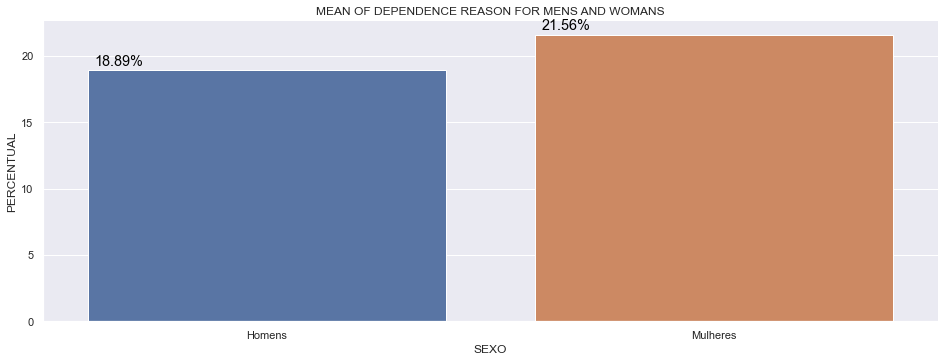

In [96]:
# GRAPHIC

#theme of graphic
sns.set_theme(style='darkgrid')

#graphic type categorical barplot for visualization our analysis
ax = sns.catplot(data=R, x=['Homens', 'Mulheres'], y=[mean_mdr, mean_wdr], kind='bar')

#set labels of axis and title
ax.set(title='MEAN OF DEPENDENCE REASON FOR MENS AND WOMANS')
ax.figure.set_size_inches(15,5)
ax.set_xlabels('SEXO')
ax.set_ylabels('PERCENTUAL')

#insert a number over the bar
ax = ax.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}%'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

In [97]:
# Lets to see by median

# mens
median_mdr = R['DRH (%)'].median()

#womens
median_wdr = R['DRM (%)'].median()

#printing
print('Median of mens dependence: {}'.format(median_mdr))
print('Median of womens dependence: {}'.format(median_wdr))

# Median is very much realize with mean

Median of mens dependence: 18.77
Median of womens dependence: 21.54


#### Distribution for mens

C:\Users\engke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Data Distribution of MDR (mens dependence reason)'}, xlabel='DRH (%)', ylabel='Density'>

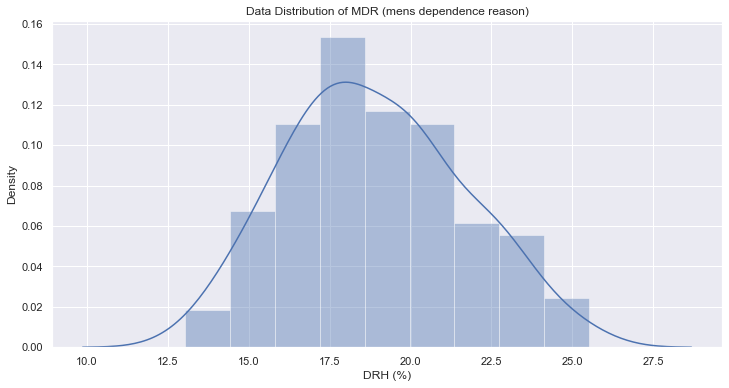

In [98]:
# PLOTING GRAPHIC FOR OBSERVATION OUR DISTRIBUTION

ax = sns.distplot(R['DRH (%)'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Data Distribution of MDR (mens dependence reason)')
ax

#### Distribution for womans

C:\Users\engke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Data Distribution of WDR (woman dependence reason)'}, xlabel='DRM (%)', ylabel='Density'>

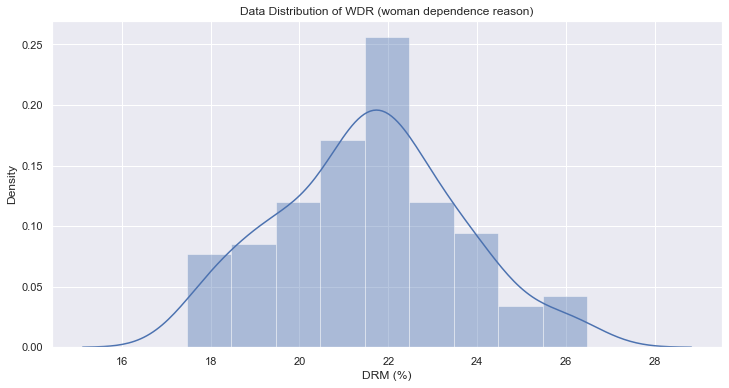

In [99]:
ax = sns.distplot(R['DRM (%)'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Data Distribution of WDR (woman dependence reason)')
ax

In [100]:
R['DRH (%)'].quantile([i/100 for i in range(25, 100, 25)])

0.25    16.88
0.50    18.77
0.75    20.59
Name: DRH (%), dtype: float64

In [101]:
R['DRM (%)'].quantile([i/100 for i in range(25, 100, 25)])

0.25    20.30
0.50    21.54
0.75    22.84
Name: DRM (%), dtype: float64

#### Observation for mens and womans
- median
- quantiles

Text(0.5, 1.0, 'Distribution of frequency of dependence')

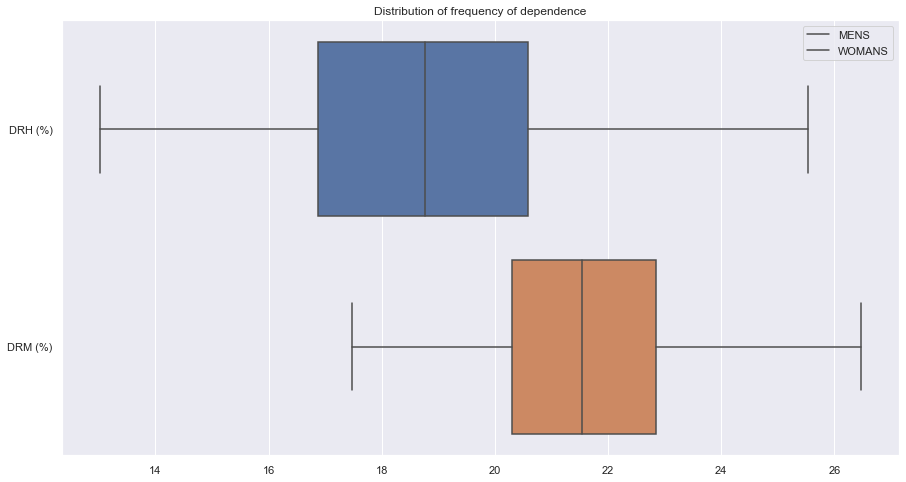

In [102]:
# Distribution of frequency of dependence
ax = sns.boxplot(data=R[['DRH (%)','DRM (%)']], orient='h')
ax.legend(['MENS', 'WOMANS'], ncol=1, frameon=True)
ax.set_title('Distribution of frequency of dependence')

## 6.0 ANALYSES DEPENDENCE REASON FOR MENS AND WOMANS FOR DISTRICT AND REGIONAL

#### 1º OUR ANALYSIS IS ALMOST ORGANIZED, BUT LETS UNDERSTENDING BETTER.

#### DEPENDENCE FOR DISTRICT

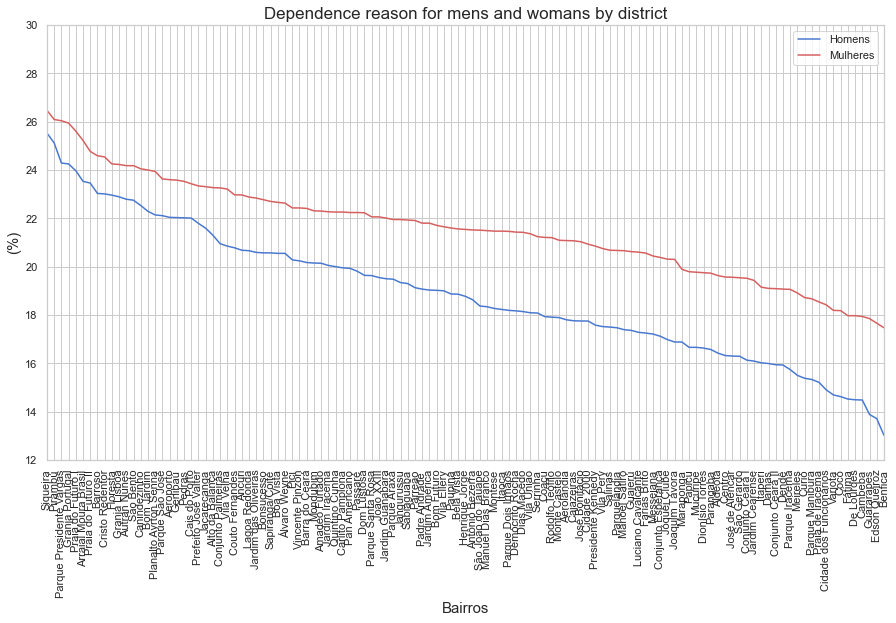

In [105]:
#define theme in sns
sns.set_theme(style="whitegrid")

#set color
sns.set_color_codes("pastel")

#lineplot ploting line graphic for our visualization (dependence mens)
sns.lineplot(data=R.sort_values(by='DRH (%)', ascending=False),
             y='DRH (%)',
             x=R.sort_values(by='DRM (%)', ascending=False).index,
             color='b')

#set another color
sns.set_color_codes("muted")

#another lineplot dependence of womans
sns.lineplot(data=R.sort_values(by='DRM (%)', ascending=False),
             y='DRM (%)',
             x=R.sort_values(by='DRM (%)', ascending=False).index,
             color='r')

#ajust the graphic, configs etc...
plt.xlim(0,116)
plt.ylim(12,30)
plt.title('Dependence reason for mens and womans by district', fontsize=(17))
plt.ylabel('(%)', fontsize=(15))
plt.xlabel('Bairros', fontsize=(15))
plt.legend(['Homens','Mulheres'])
plt.xticks(rotation=90)
plt.show()

In [120]:
percent = pd.value_counts(data.REGIONAL)
percent

REGIONAL 6    28
REGIONAL 2    21
REGIONAL 4    19
REGIONAL 5    18
REGIONAL 3    16
REGIONAL 1    15
Name: REGIONAL, dtype: int64

In [128]:
RDR = data.groupby('REGIONAL').sum()['Razão de Dependência']
RDR

REGIONAL
REGIONAL 1     637.950000
REGIONAL 2     792.660000
REGIONAL 3     648.570000
REGIONAL 4     727.172596
REGIONAL 5     783.210000
REGIONAL 6    1143.198320
Name: Razão de Dependência, dtype: float64